In [1]:
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.metrics import confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd drive/MyDrive/프로젝트

/content/drive/MyDrive/프로젝트


In [4]:
from CNN.layers.convolutional import Conv
from CNN.layers.pooling import MaxPooling
from CNN.layers.flatten import Flatten
from CNN.layers.dense import DenseLayer
from CNN.layers.softmax import Softmax
from CNN.layers.relu import Relu
from CNN.layers.dropout import Dropout

In [5]:
from CNN_Cupy.layers.convolutional import Conv
from CNN_Cupy.layers.pooling import MaxPooling
from CNN_Cupy.layers.flatten import Flatten
from CNN_Cupy.layers.dense import DenseLayer
from CNN_Cupy.layers.softmax import Softmax
from CNN_Cupy.layers.relu import Relu
from CNN_Cupy.layers.dropout import Dropout

In [6]:
from CNN_Cupy.optimizer.adam import Adam
from CNN_Cupy.sequential import SequentialModel

In [4]:
### data
# x = np.load('./Dataset/x.npy')
# y_data = np.load('./Dataset/y.npy')

# y=np.array([[0,0,0]])
# for i in y_data:
#     if i == 0:
#         label=np.array([1,0,0])
#     elif i == 1:
#         label=np.array([0,1,0]) 
#     else:
#         label=np.array([0,0,1])  
#     label=label.reshape(1,3)
#     y=np.concatenate([y,label],axis=0)
# # 이게 one-hot vector 값 ( 처음에 초기화 한거 지움 )
# y=np.delete(y,0,axis=0)

In [ ]:
# test_idx = random.sample(range(len(x)),int(0.3*len(x)))
# x_test = x[test_idx,:,:]
# x_train = np.delete(x, test_idx, axis=0)
# y_test = y[test_idx,:]
# y_train = np.delete(y, test_idx, axis=0)

In [ ]:
# test_idx = random.sample(range(len(y)), 128)

# np.save('./Dataset/x_tmp.npy', x[test_idx])
# np.save('./Dataset/y_tmp.npy',y[test_idx])


In [7]:
x_train = np.load('./Dataset/x_tmp.npy')
x_train = x_train.reshape(len(x_train), 224,224,1)
y_train = np.load('./Dataset/y_tmp.npy')


In [8]:
import cupy as np
x_train = np.array(x_train)
y_train = np.array(y_train)

In [25]:
bs = 64  #batch size

layers = [
    Conv(num_stride=1, padding = "same", num_filter=64, filter_size=(3, 3, 1), input_shape = (bs, 224,224,1)),
    Relu(),
    Conv(num_stride=1, padding = "same", num_filter=128, filter_size=(3, 3, 64), input_shape = (bs, 224,224,64)),
    Relu(),
    MaxPooling(size=(2, 2), stride=2),
#     Dropout(dropout_rate=0.75),
    Conv(num_stride=1, padding = "same", num_filter=256, filter_size=(3, 3, 128), input_shape = (bs, 112,112,128)),
    Relu(),
    MaxPooling(size=(2, 2), stride=2),
    Conv(num_stride=1, padding = "same", num_filter=512, filter_size=(3, 3, 256), input_shape = (bs, 56,56,256)),
    Relu(),
    MaxPooling(size=(2, 2), stride=2),
    Conv(num_stride=1, padding = "same", num_filter=512, filter_size=(3, 3, 512), input_shape = (bs, 28,28,512)),
    Relu(),
    MaxPooling(size=(2, 2), stride=2),
    Conv(num_stride=1, padding = "same", num_filter=512, filter_size=(3, 3, 512), input_shape = (bs, 14,14,512)),
    Relu(),
    MaxPooling(size=(2, 2), stride=2),
    Conv(num_stride=1, padding = "same", num_filter=512, filter_size=(3, 3, 512), input_shape = (bs, 7,7,512)),
    Relu(),   
    Flatten(),
    DenseLayer.initialize(prev_num=7*7*512, after_num=4096),
    Relu(),
    Dropout(dropout_rate=0.75),
    DenseLayer.initialize(prev_num=4096, after_num=4096),
    Relu(),
    Dropout(dropout_rate=0.75),
    DenseLayer.initialize(prev_num=4096, after_num=3),
    Softmax()
]

optimizer = Adam(lr=0.003)

model = SequentialModel(
    layers=layers,
    optimizer=optimizer
)

In [12]:
bs=64
layers = [
    Conv(num_stride=1, padding = "same", num_filter=64, filter_size=(3, 3, 1), input_shape = (bs, 224,224,1)),
    Relu(),
    MaxPooling(size=(2, 2), stride=2),
    Dropout(dropout_rate=0.75),
    
    Conv(num_stride=1, padding = "same", num_filter=128, filter_size=(3, 3, 64), input_shape = (bs, 112,112,64)),
    Relu(),
    MaxPooling(size=(2, 2), stride=2),
    Dropout(dropout_rate=0.75),
    Flatten(),
    DenseLayer.initialize(prev_num=56*56*128, after_num=3),
    Softmax()
]
optimizer = Adam(lr=0.003)
model = SequentialModel(
    layers=layers,
    optimizer=optimizer
)

In [13]:
epochs = 100
model.train(x_train = x_train, y_train = y_train, epochs = epochs, batch_size = bs)
model.test(x_test = x_test, y_test = y_test, batch_size = bs)

  0%|          | 0/11 [00:00<?, ?it/s]

(64, 226, 226, 1)


 36%|███▋      | 4/11 [00:11<00:21,  3.10s/it]

(64, 226, 226, 64)


 64%|██████▎   | 7/11 [00:18<00:11,  2.91s/it]

ValueError: ignored

ValueError: ignored

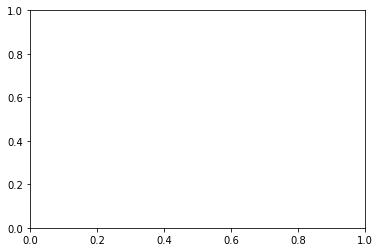

In [28]:
plt.plot(range(epochs), model.train_accuracy)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

In [ ]:
plt.plot(range(epochs), model.train_loss)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()